In [15]:
import pandas as pd
from nltk.stem.porter import PorterStemmer

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
df = pd.read_csv('/content/Restaurant_Reviews 1.tsv', delimiter = '\t', quoting =3)

In [17]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [23]:
df.shape

(1000, 2)

In [22]:
import re

In [24]:
corpus = []
for i in range(0,1000):
  review = re.sub(pattern = '[^a-zA-Z]', repl =' ', string =df['Review'][i])
  review= review.lower()
  review_word = review.split()
  review_word = [word for word in review_word if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  review1 = [ps.stem(word) for word in review_word]
  #Join the stemmed words back into a single string
  review = ' '.join(review1)
  corpus.append(review)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

tfid_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
print(tfid_df.tail(30))

     absolut  absolutley  accid  accommod  accomod  accordingli  account  ach  \
970      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
971      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
972      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
973      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
974      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
975      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
976      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
977      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
978      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
979      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
980      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
981      0.0         0.0    

In [4]:
ps = PorterStemmer()
words =["eat","eating","read","reading","congratulations","eaten"]
for word in words:
  print(ps.stem(word))

eat
eat
read
read
congratul
eaten


In [5]:
from nltk.stem import WordNetLemmatizer

In [6]:
import nltk
nltk.download('wordnet')
lemma = WordNetLemmatizer()
words =["eat","eating","read","reading","congratulations","eaten"]
for word in words:
  print(lemma.lemmatize(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...


eat
eating
read
reading
congratulation
eaten


In [7]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
data_standarized = scaler.fit_transform(tfid_df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standarized)

In [32]:
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
print(principal_df.head())

   principal component 1  principal component 2
0              -0.096543              -0.100831
1              -0.080917              -0.099793
2              -0.105197              -0.124104
3              -1.271807              -0.072593
4              -0.087132              -0.118267


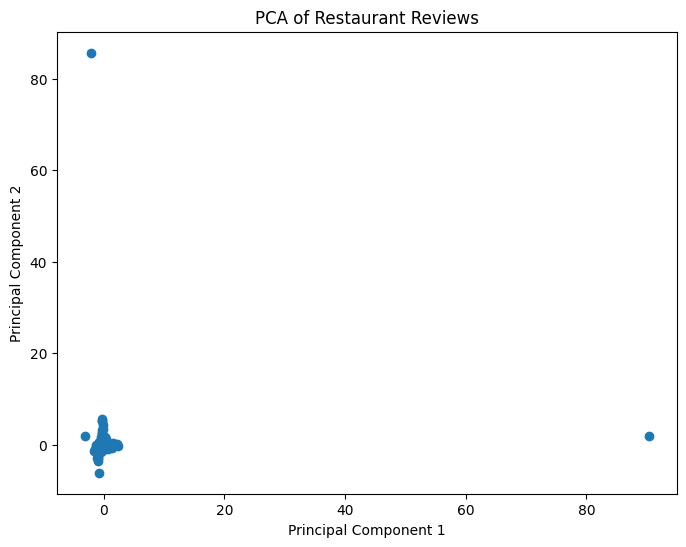

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Restaurant Reviews')
plt.show()

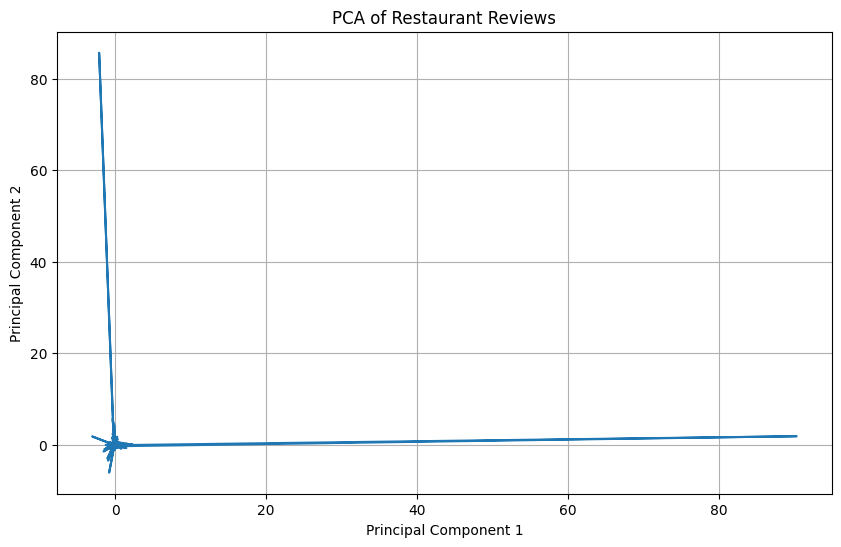

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(principal_df['principal component 1'], principal_df['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Restaurant Reviews')
plt.grid(True)
plt.show()